<a href="https://colab.research.google.com/github/rachita55/Neural-Network/blob/master/Pytorch_MNIST_Classification_D19025_Rachita_Pateria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Neural Network?**

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. The networks are built from individual parts approximating neurons, typically called units or simply “neurons.” Each unit has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit’s output.

Here we created 3 linear layers using RelU activation function.
ReLU activation ( an activation function which allows positive values to pass through, whereas negative values are modified to zero )
The output layer is a linear layer with LogSoftmax activation because this is a classification problem. Notw that Softmax is only applicable to the output layer.

The softmax function, also known as softargmax or normalized exponential functionis a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.autograd import Variable
from time import time

# Defining the transformations
transform = transforms.Compose([transforms.ToTensor()])

# Download the dataset, shuffle it & assign train and test sets
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset = datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)
# Assign batch size = 64 (batch size is the number of images we want to read in one go)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape) #64 images in each batch & each image has dimension 28x28


0it [00:00, ?it/s]

9920512it [00:06, 1623274.42it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 121029.31it/s]           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


1654784it [00:02, 747582.56it/s]                             
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


8192it [00:00, 46803.15it/s]            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!
torch.Size([64, 1, 28, 28])


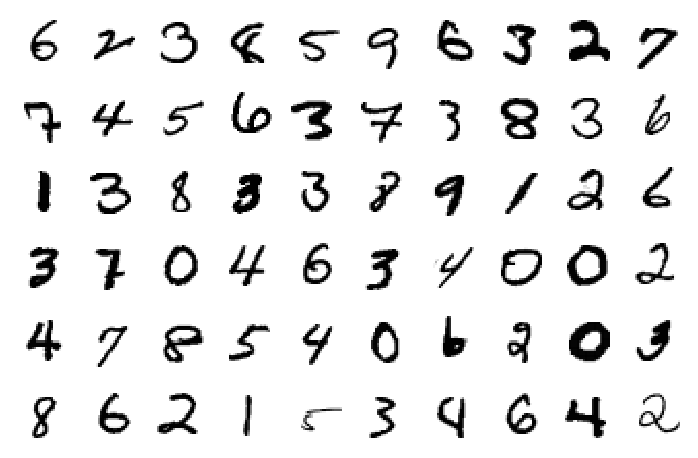

In [2]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
# Model 1 : 2 Layer
# Neural network with epoch = 10 and learning rate = 0.01
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Input Layer
        self.fc1 = nn.Linear(784, 256)
        #Output Layer 
        self.fc2 = nn.Linear(256, 10) 
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Define RelU activation function now with dropout
        x = self.dropout(F.relu(self.fc1(x)))

        # Defining softmax output; since output so no dropout here
        x = F.log_softmax(self.fc2(x), dim=1)

        return x

# Create a network     
model=Network()

optimizer=optim.SGD(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0]
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))
        pytorch_total_params = sum(p.numel() for p in model.parameters())

print("Epoch: {}/{} - ".format(e+1, epochs),
              "Training Loss: {:.3f}  ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}  ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)),
              "Total parameters: {:.3f}".format(pytorch_total_params))

Epoch: 10/10 -  Training Loss: 0.268   Test Loss: 0.238   Test Accuracy: 0.933 Total parameters: 203530.000


In [10]:
# Model 2 : 3 Layers
# Neural network with epoch = 10 and learning rate = 0.01
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Input Layer
        self.fc1 = nn.Linear(784, 256)
        #1st Hidden Layer 
        self.fc2 = nn.Linear(256, 64)
        #Output Layer 
        self.fc3 = nn.Linear(64, 10)
 
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Define RelU activation function now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))

        # Defining softmax output; since output so no dropout here
        x = F.log_softmax(self.fc3(x), dim=1)

        return x

# Create a network     
model=Network()

optimizer=optim.SGD(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0]
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

print("Epoch: {}/{} - ".format(e+1, epochs),
              "Training Loss: {:.3f}  ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}  ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)),
              "Total parameters: {:.3f}".format(pytorch_total_params))

Epoch: 10/10 -  Training Loss: 0.260   Test Loss: 0.200   Test Accuracy: 0.941 Total parameters: 203530.000


In [22]:
# Model 3 : 4 Layers
# Neural network with epoch = 10 and learning rate = 0.01
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Input Layer
        self.fc1 = nn.Linear(784, 256)
        #1st Hidden Layer 
        self.fc2 = nn.Linear(256, 128)
        #2nd Hidden Layer 
        self.fc3 = nn.Linear(128, 64)
        # Output Layer 
        self.fc4 = nn.Linear(64, 10) 
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Define RelU activation function now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x))) 

        # Defining softmax output; since output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# Create a network     
model=Network()

optimizer=optim.SGD(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0]
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

print("Epoch: {}/{} - ".format(e+1, epochs),
              "Training Loss: {:.3f}  ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}  ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)),
              "Total parameters: {:.3f}".format(pytorch_total_params))

Epoch: 10/10 -  Training Loss: 0.256   Test Loss: 0.182   Test Accuracy: 0.945 Total parameters: 203530.000


In [20]:
# Model 3 : 4 Layers
# Neural network with epoch = 10 and learning rate = 0.03
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Input Layer
        self.fc1 = nn.Linear(784, 256)
        #1st Hidden Layer 
        self.fc2 = nn.Linear(256, 128)
        #2nd Hidden Layer 
        self.fc3 = nn.Linear(128, 64)
        # Output Layer 
        self.fc4 = nn.Linear(64, 10) 
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Define RelU activation function now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x))) 

        # Defining softmax output; since output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# Create a network     
model=Network()

optimizer=optim.SGD(model.parameters(),lr=0.03)
criterion=nn.NLLLoss()

epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0]
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

print("Epoch: {}/{} - ".format(e+1, epochs),
              "Training Loss: {:.3f}  ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}  ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)),
              "Total parameters: {:.3f}".format(pytorch_total_params))

Epoch: 10/10 -  Training Loss: 0.111   Test Loss: 0.090   Test Accuracy: 0.974 Total parameters: 203530.000


In [19]:
# Model 3 : 4 Layers
# Neural network with epoch = 10 and learning rate = 0.05
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Input Layer
        self.fc1 = nn.Linear(784, 256)
        #1st Hidden Layer 
        self.fc2 = nn.Linear(256, 128)
        #2nd Hidden Layer 
        self.fc3 = nn.Linear(128, 64)
        # Output Layer 
        self.fc4 = nn.Linear(64, 10) 
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Define RelU activation function now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x))) 

        # Defining softmax output; since output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# Create a network     
model=Network()

optimizer=optim.SGD(model.parameters(),lr=0.05)
criterion=nn.NLLLoss()

epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0]
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

print("Epoch: {}/{} - ".format(e+1, epochs),
              "Training Loss: {:.3f}  ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}  ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)),
              "Total parameters: {:.3f}".format(pytorch_total_params))

Epoch: 10/10 -  Training Loss: 0.084   Test Loss: 0.079   Test Accuracy: 0.977 Total parameters: 203530.000


In [18]:
# Model 3 : 4 Layers
# Neural network with epoch = 10 and learning rate = 0.1
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Input Layer
        self.fc1 = nn.Linear(784, 256)
        #1st Hidden Layer 
        self.fc2 = nn.Linear(256, 128)
        #2nd Hidden Layer 
        self.fc3 = nn.Linear(128, 64)
        # Output Layer 
        self.fc4 = nn.Linear(64, 10) 
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Define RelU activation function now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x))) 

        # Defining softmax output; since output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# Create a network     
model=Network()

optimizer=optim.SGD(model.parameters(),lr=0.1)
criterion=nn.NLLLoss()

epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0]
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

print("Epoch: {}/{} - ".format(e+1, epochs),
              "Training Loss: {:.3f}  ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}  ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)),
              "Total parameters: {:.3f}".format(pytorch_total_params))

Epoch: 10/10 -  Training Loss: 0.060   Test Loss: 0.074   Test Accuracy: 0.979 Total parameters: 203530.000
